## 1. Intro

The dataset is coming from the open source network analyzing software `"Wireshark"`. The dataset contains information about `network packets` travelling between client, server and network devices in between such as routers and swithces. `"Network packet"` or `"packet"` is a unit of data that is transmitted over a network. It's the basic unit of communication in network protocols such as the Internet Protocol. A packet typically consists of two main parts: `the header` and `the payload`. `The header` contains control information such as the source and destination addresses, protocol information, packet sequence number, and error detection codes. `The payload` contains the actual data being transmitted. The source dataset didn't contain information about header and payload and that must be due to privacy. 

The dataset also contains information about whether the network packets class is `normal` or `non-normal`, i.e. have been used to perform network attacks.

The dataset is coming from the open source network analyzing software "Wireshark". The dataset contains information about network packets travelling between client, server and network devices in between such as routers and swithces. "Network packet" or "packet" is a unit of data that is transmitted over a network. It's the basic unit of communication in network protocols such as the Internet Protocol. A packet typically consists of two main parts: the header and the payload. The header contains control information such as the source and destination addresses, protocol information, packet sequence number, and error detection codes. The payload contains the actual data being transmitted. The source dataset didn't contain information about header and payload and that must be due to privacy.

The dataset also contains information about whether the network packets are normal or non-normal, i.e. have been used to perform network attacks.

### 1.1 Data Dictionary

To help us with our analysis, let's take a look at the data dictionary below.

#### Packet source and destination information
- SRC_ADD (numeric). Source (client) IP address. Due to sensitivty, IP address has been encrypted.
- DES_ADD (numeric). Destination (server) IP address. Due to sensitivty, IP address is encrypted.
- FROM_NODE (numeric). Identifier (IP) for the source node in the network. This is the source node for the packets under consideration. The source nodes are clients, servers, switches and routers indicating where the current packets have originated from.
- TO_NODE (numeric). Identifier (IP) for the destination node in the network. This is the destination node for the packets under consideration. The destination nodes are clients, servers, switches and routers indicating which device will receive the packets.
- NODE_NAME_FROM (object). Same as FROM_NODE but identifier is a hostname.
- NODE_NAME_TO (object). Same as TO_NODE but identifier is a hostname.

#### Packet size information

- PKT_SIZE (numeric). Size of the network packet in bytes.
- NUMBER_OF_BYTE (numeric). The total number of bytes transmitted within a flow or connection.
- PKT_AVG_SIZE (numeric). The average amount of data (in bytes) contained in each packet exchanged between network nodes. 

#### All other information about packet and network.
- PKT_ID (numeric). Unique identifier for each network packet.
- PKT_TYPE (object). Common packet types: 

a. TCP (Transmission Control Protocol). TCP is a connection-oriented protocol used for reliable and ordered data transmission. 

b. UDP (User Datagram Protocol). UDP is a connectionless protocol used for fast and lightweight data transmission.

c. ICMP (Internet Control Message Protocol). ICMP is a network-layer protocol used for error reporting and diagnostics. Common packet types associated with ICMP include:
Echo request and reply that are used for ping tests to check network connectivity.
- FLAGS (object). TCP flags or control bits associated with a TCP packet. TCP uses a set of control flags to indicate various aspects of packet behavior, such as the SYN (synchronize), ACK (acknowledge), FIN (finish), RST (reset), and others.
- FID (numeric). Flow Identifier. A unique identifier associated with a flow of network traffic. A flow is a unidirectional sequence of packets between a specific source and destination, typically identified by their IP addresses and port numbers.
- SEQ_NUMBER (numeric). Sequence Number. Sequence number of a TCP packet within a TCP connection. TCP uses sequence numbers to ensure the ordered delivery of data segments and to detect and recover from packet loss or reordering.
- NUMBER_OF_PKT (numeric). Number of Packets. The total number of packets transmitted within a flow or connection.
- PKT_RATE (numeric). Packet transmission rate. Packet transmission rate, measured in packets per second (pps) or packets per unit time.
- BYTE_RATE (numeric). The rate at which bytes are transmitted or received over the network within a specific time interval. Expressed in bytes per second (B/s). 
- UTILIZATION (numeric). Utilization of a network link or resource. The degree to which the network link or resource is being used, expressed as a percentage.

#### Field of interest
- PKT_CLASS. Packet class. Target value indicating class of the packet.

#### Question of interest

How to identify malicious traffic that intends to disrupt the normal operation of a network, service, or website. The goal of network attack is to overwhelm the target with a flood of traffic, making it inaccessible to legitimate users.

## 2. Load data

### 2.1 Laoding data

In [9]:
import pandas as pd

In [10]:
network_df = pd.read_csv("C:/Users/askha/OneDrive/Desktop/BrainStation/Capstone/DDos_attack_detection/datasets/final-dataset.csv")

In [11]:
network_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


## 3. EDA

Wireshark has provided us with this snapshot of network traffic. First, let's take a look at what we're working with, and assess the level of cleaning and preprocessing that needs to be done.

In [12]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Check
network_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


In [12]:
# How much data are we working with here?
print(network_df.shape)

(2160668, 28)


In [13]:
print(f'Our dataframe has {network_df.shape[0]} rows and {network_df.shape[1]} columns.')

Our dataframe has 2160668 rows and 28 columns.


We have `2 160 668` rows of `28` different variables that were provided. However, possibly some concern as there does not appear to be a unique packet identifier, `PKT_ID` has duplicates since one packet travels accross network devices (nodes) to get to the destination. We will proceed with caution, and check for duplicates in the data and so on.

Next steps:

- Check datatypes and formats
- Check for duplicate data (is the data unique on the row-level?
- Check for missing data

### 3.1 Check datatypes and missing data

First we will investigate the structure and format of the data to make sure that nothing is missed.

In [5]:
network_df.head(4)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal


We see a variety of numerical (int/float) and non-numeric columns. Furthermore:

In [6]:
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NUMBER_OF_BYTE    int64  
 12  NODE_NAME_FROM    object 
 13  NODE_NAME_TO      object 
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

In [7]:
# Count the number of null or empty values in each column
null_columns = network_df.isnull().sum()  # Count null values in each column
empty_columns = (network_df == '').sum()  # Count empty values in each column

# Total number of null or empty values in each column
total_null_empty_columns = null_columns + empty_columns

print("Number of null or empty columns:")
print(total_null_empty_columns)

Number of null or empty columns:
SRC_ADD             0
DES_ADD             0
PKT_ID              0
FROM_NODE           0
TO_NODE             0
PKT_TYPE            0
PKT_SIZE            0
FLAGS               0
FID                 0
SEQ_NUMBER          0
NUMBER_OF_PKT       0
NUMBER_OF_BYTE      0
NODE_NAME_FROM      0
NODE_NAME_TO        0
PKT_IN              0
PKT_OUT             0
PKT_R               0
PKT_DELAY_NODE      0
PKT_RATE            0
BYTE_RATE           0
PKT_AVG_SIZE        0
UTILIZATION         0
PKT_DELAY           0
PKT_SEND_TIME       0
PKT_RESEVED_TIME    0
FIRST_PKT_SENT      0
LAST_PKT_RESEVED    0
PKT_CLASS           0
dtype: int64


**There is no null or empry values across dataset.**

### 3.2 Checking for duplicate data and correlation

Now that the data appears sufficiently clean, we will check for duplicate data. First, on the row level.

In [23]:
# Checking for duplicates and counting
network_df.duplicated().sum()

0

There are no duplicate rows in the dataset.

Let us also be thorough and check that no two columns also contain the same information. To do this, we will take the original dataframe's transpose, and check for duplicates on its rows level

In [ ]:
#network_df.T.duplicated()

This operation took a lot of computational time and was not able complete.

In [8]:
# Select only numeric columns from network_df
numeric_columns = network_df.select_dtypes(include='number')

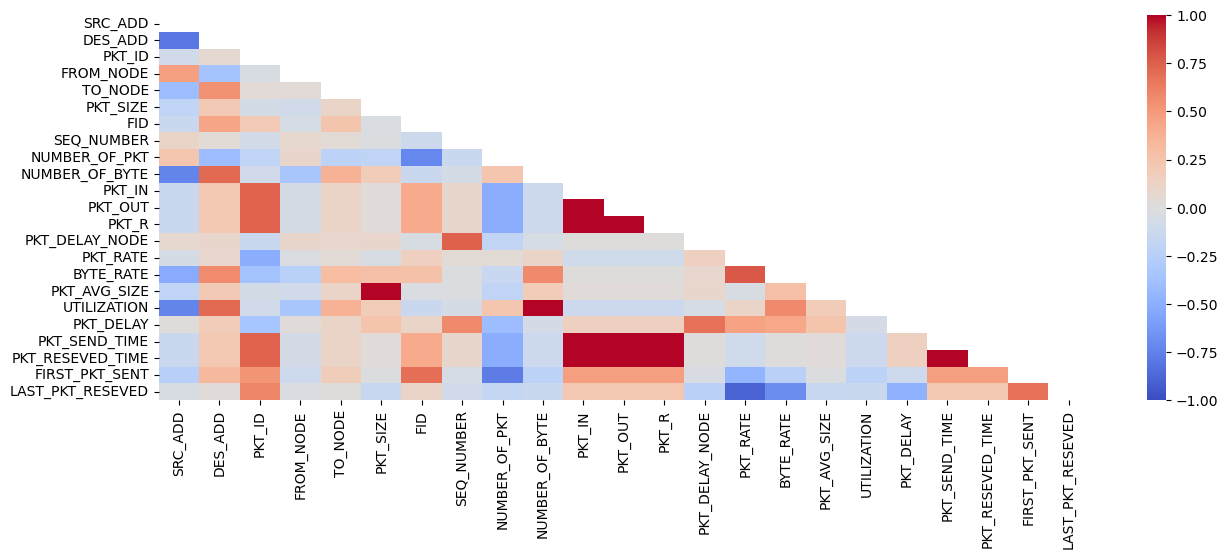

In [9]:
# Generate correlation matrix
correlation_matrix = numeric_columns.corr()

# Generate mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmax=1.0, vmin=-1.0, mask=mask)
plt.show()

In [10]:
# Assuming numeric_columns is your DataFrame containing numeric columns
# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Filter correlation matrix to get pairs of columns with correlation greater than 0.9
high_correlation_values = corr_matrix[corr_matrix.abs() > 0.9].stack().reset_index()

# Rename the columns
high_correlation_values.columns = ['Column 1', 'Column 2', 'Correlation']

# Filter out self-correlations (where Column 1 is the same as Column 2)
high_correlation_values = high_correlation_values[high_correlation_values['Column 1'] != high_correlation_values['Column 2']]

# Display the values
print(high_correlation_values)

            Column 1          Column 2  Correlation
6           PKT_SIZE      PKT_AVG_SIZE          1.0
11    NUMBER_OF_BYTE       UTILIZATION          1.0
13            PKT_IN           PKT_OUT          1.0
14            PKT_IN             PKT_R          1.0
15            PKT_IN     PKT_SEND_TIME          1.0
16            PKT_IN  PKT_RESEVED_TIME          1.0
17           PKT_OUT            PKT_IN          1.0
19           PKT_OUT             PKT_R          1.0
20           PKT_OUT     PKT_SEND_TIME          1.0
21           PKT_OUT  PKT_RESEVED_TIME          1.0
22             PKT_R            PKT_IN          1.0
23             PKT_R           PKT_OUT          1.0
25             PKT_R     PKT_SEND_TIME          1.0
26             PKT_R  PKT_RESEVED_TIME          1.0
30      PKT_AVG_SIZE          PKT_SIZE          1.0
32       UTILIZATION    NUMBER_OF_BYTE          1.0
35     PKT_SEND_TIME            PKT_IN          1.0
36     PKT_SEND_TIME           PKT_OUT          1.0
37     PKT_S

**Highly (corr>0.9) correlating items:**
* PKT_IN and PKT_OUT
* PKT-R and PKT_IN
* PKT_R and PKT_OUT
* PKT_AVG_SIZE and PKT_SIZE
* PKT_SEND_TIME and PKT_RESEVED_TIME
* UTILIZATION and NUMBER_OF_BYTE
* PKT_RESEVED_TIME and PKT_OUT

So, `PKT_IN`, `PKT_OUT`, `PKT_R`, `PKT_AVG_SIZE`, `PKT_SEND_TIME` and `NUMBER_OF_BYTES` will be removed to avoid collinearity.  

In [14]:
network_df1 = network_df.drop(columns=['PKT_IN','PKT_OUT', 'PKT_R', 'PKT_AVG_SIZE', 'PKT_SEND_TIME', 'NUMBER_OF_BYTE'])

In [15]:
#checking corr once again
# Select only numeric columns from network_df
numeric_columns = network_df1.select_dtypes(include='number')

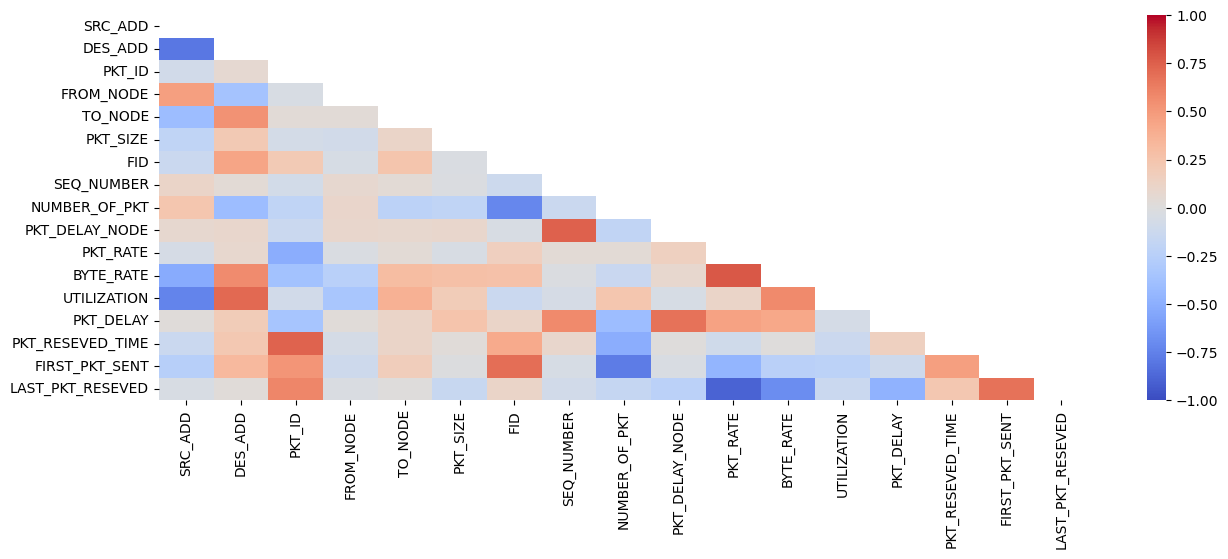

In [13]:
# Generate correlation matrix
correlation_matrix = numeric_columns.corr()

# Generate mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmax=1.0, vmin=-1.0, mask=mask)
plt.show()

In [14]:
# Assuming numeric_columns is your DataFrame containing numeric columns
# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Filter correlation matrix to get pairs of columns with correlation greater than 0.9
high_correlation_values = corr_matrix[corr_matrix.abs() > 0.9].stack().reset_index()

# Rename the columns
high_correlation_values.columns = ['Column 1', 'Column 2', 'Correlation']

# Filter out self-correlations (where Column 1 is the same as Column 2)
high_correlation_values = high_correlation_values[high_correlation_values['Column 1'] != high_correlation_values['Column 2']]

# Display the values
print(high_correlation_values)

Empty DataFrame
Columns: [Column 1, Column 2, Correlation]
Index: []


**We made sure that there are no more highly highly correlating variables.**

### 3.3 Data Analysis

Now that we've verified that data is clean, let's do some analysis to address our original question:

What are the characteristics of the packets that account for malicious network traffic?

We will divide our data into categorical and numeric and proceed in this way.

#### 3.3.1 Univariate Analysis - Categorical¶

Let's look at the variable of interest again, 'PKT_CLASS':

In [15]:
# Check the distribution of normal vs. malicisous traffic
network_df1['PKT_CLASS'].value_counts()/network_df.shape[0]*100.0

PKT_CLASS
Normal        89.600022
UDP-Flood      9.318600
Smurf          0.582690
SIDDOS         0.308469
HTTP-FLOOD     0.190219
Name: count, dtype: float64

We see above, there is about a `90/10` split in 'normal' and malicious traffic. `~9%` of malicious traffic is 'UDP-Flood' and the 
rest marginally distributed between 'Smurf', 'SIDDOS' and 'HTTP-FLOOD'.

Let's take a look at the network traffic overall.

Split the data into categorical and numerical variables, and do some EDA for both types.



In [16]:
network_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NODE_NAME_FROM    object 
 12  NODE_NAME_TO      object 
 13  PKT_DELAY_NODE    float64
 14  PKT_RATE          float64
 15  BYTE_RATE         float64
 16  UTILIZATION       float64
 17  PKT_DELAY         float64
 18  PKT_RESEVED_TIME  float64
 19  FIRST_PKT_SENT    float64
 20  LAST_PKT_RESEVED  float64
 21  PKT_CLASS         object 
dtypes: float64(10), int64(7), object(5)
memory usage: 362.7+ MB


In [17]:
# Make a new dataframe of only the categorical variables
categorical_df = network_df1.select_dtypes('object').copy()

# Check
categorical_df.head()

,PKT_TYPE,FLAGS,NODE_NAME_FROM,NODE_NAME_TO,PKT_CLASS
0,tcp,-------,Switch1,Router,Normal
1,tcp,-------,Router,server1,Normal
2,ack,-------,Router,Switch2,UDP-Flood
3,ack,-------,Router,Switch1,Normal
4,ack,-------,Router,Switch1,Normal


In [18]:
network_df1.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,NODE_NAME_TO,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,Router,0.0,328.240918,505490.0,0.236321,0.0,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,server1,0.0,328.205808,505437.0,0.236337,0.0,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,Switch2,0.0,328.206042,18051.3,0.008441,0.0,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,Switch1,0.0,328.064183,18043.5,0.008437,0.0,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,Switch1,0.0,328.113525,18046.2,0.008438,0.0,16.059813,1.030054,50.061864,Normal


<Figure size 1000x1000 with 0 Axes>

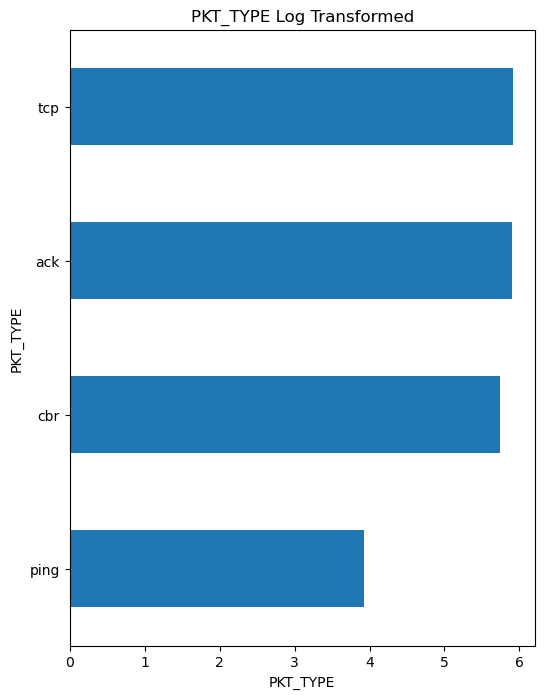

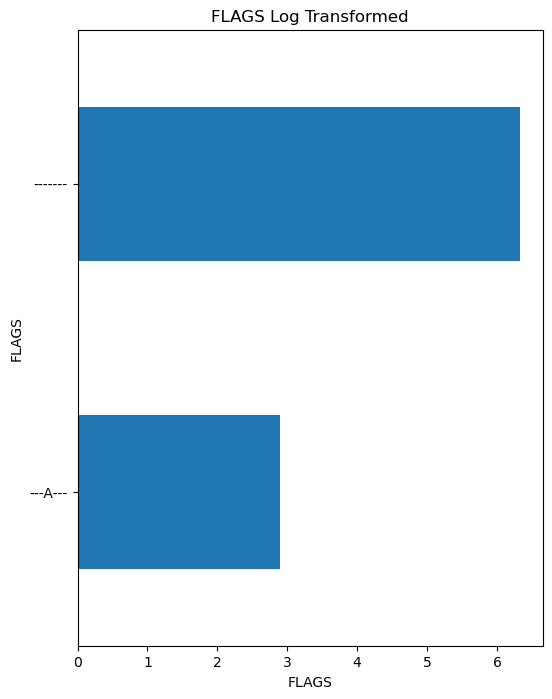

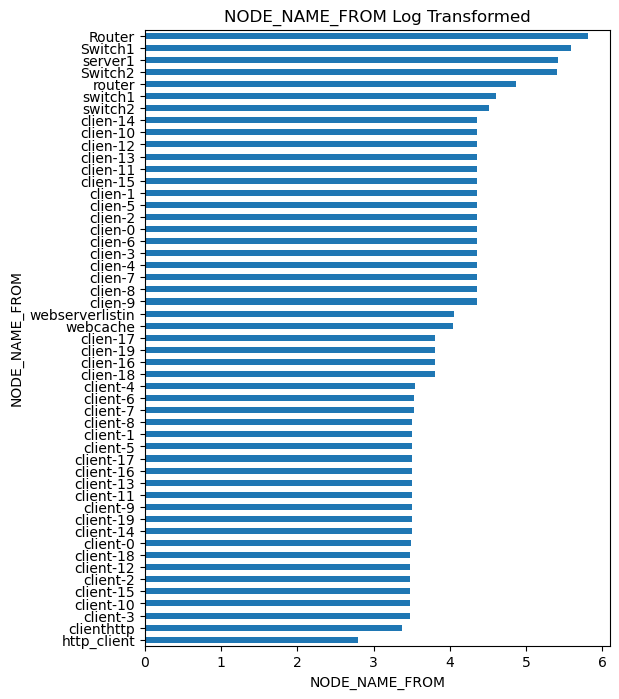

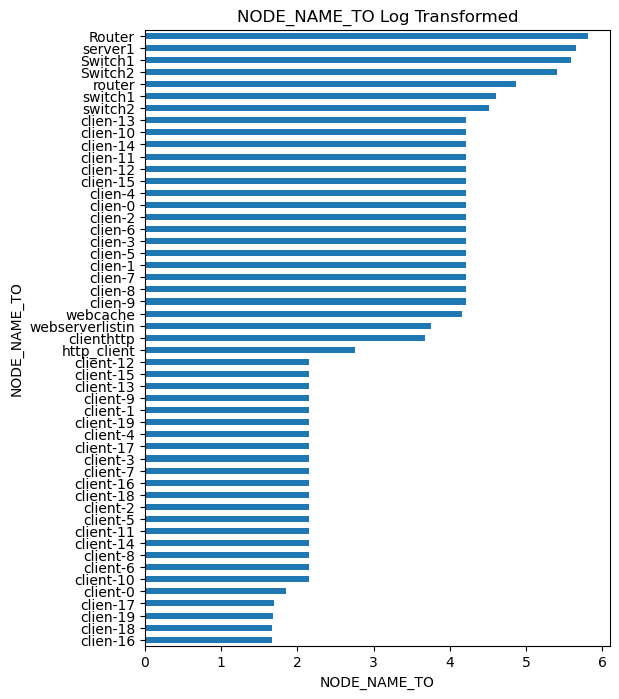

In [21]:
# Iterate over the columns
plt.figure(figsize=(10,10))
for column in categorical_df.columns[:-1]:
    plt.figure(figsize=(6,8))
    # Visualize a summary of each
    np.log10(categorical_df[column].value_counts().sort_values()).plot(kind='barh') # as values are in different scale, log transformation would help better visualize the data
    plt.xlabel(column)
    plt.title(column+" Log Transformed")
    plt.show()

In [59]:
categorical_df['FLAGS'].value_counts()

FLAGS
-------    2159876
---A---        792
Name: count, dtype: int64

In [60]:
categorical_df['PKT_TYPE'].value_counts()

PKT_TYPE
tcp     808394
ack     787530
cbr     556344
ping      8400
Name: count, dtype: int64

<font color='red'>We can see that: </font>

- Majour packet types are `tcp`(~ 800K), `ack` (~ 800K) and `cbr` (~ 550K), and marginal amount of `ping` (~8K).
- FLAGS columns has exteremely imabalanced two values, ~2.16 mln vs 792
- The majority of network traffic goes through the router and 2 swithces.
- There is only one server and 20 clients

#### 3.3.2 Univariate Analysis - Numeric variables

Let's repeat the process we did above with the numeric variables:

In [61]:
network_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NODE_NAME_FROM    object 
 12  NODE_NAME_TO      object 
 13  PKT_DELAY_NODE    float64
 14  PKT_RATE          float64
 15  BYTE_RATE         float64
 16  UTILIZATION       float64
 17  PKT_DELAY         float64
 18  PKT_RESEVED_TIME  float64
 19  FIRST_PKT_SENT    float64
 20  LAST_PKT_RESEVED  float64
 21  PKT_CLASS         object 
dtypes: float64(10), int64(7), object(5)
memory usage: 362.7+ MB


In [24]:
# Get only the numeric columns
numeric_df = network_df1.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
0,3.00,24.30,389693,21,23,1540,4,11339,16091,0.0,328.240918,505490.0,0.236321,0.0,35.550032,1.000000,50.021920
1,15.00,24.15,201196,23,24,1540,16,6274,16092,0.0,328.205808,505437.0,0.236337,0.0,20.186848,1.000000,50.030211
2,24.15,15.00,61905,23,22,55,16,1930,16092,0.0,328.206042,18051.3,0.008441,0.0,7.069962,1.030045,50.060221
3,24.90,9.00,443135,23,21,55,10,12670,16085,0.0,328.064183,18043.5,0.008437,0.0,39.647976,1.030058,50.060098
4,24.80,8.00,157335,23,21,55,9,4901,16088,0.0,328.113525,18046.2,0.008438,0.0,16.059813,1.030054,50.061864


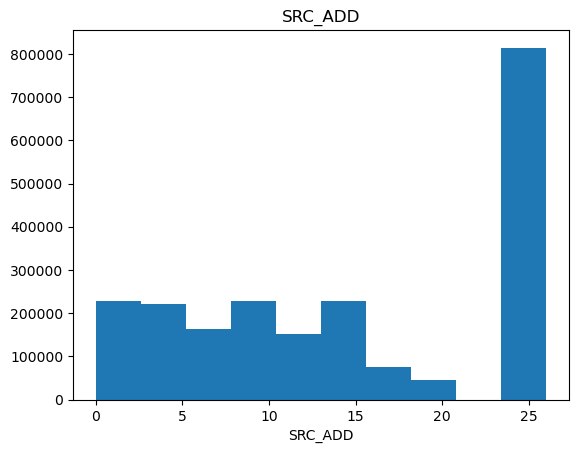

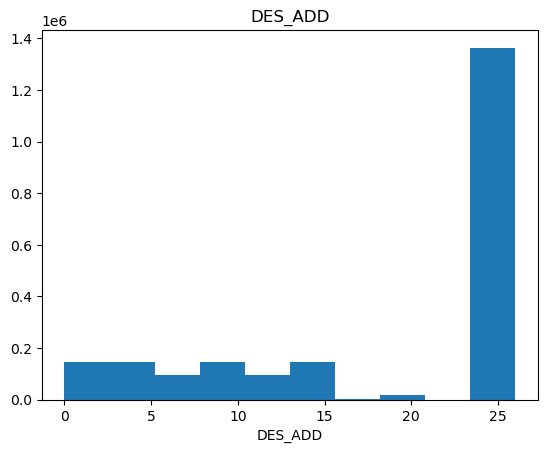

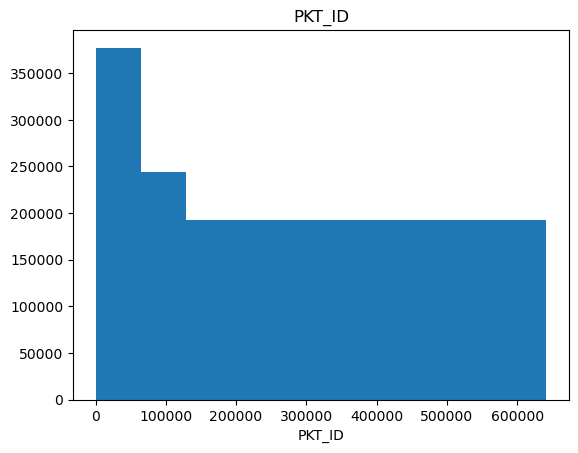

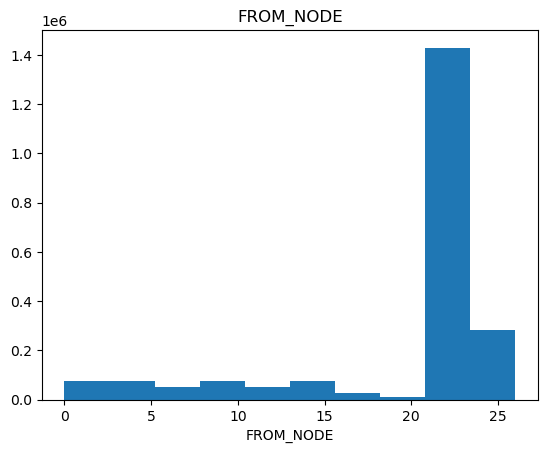

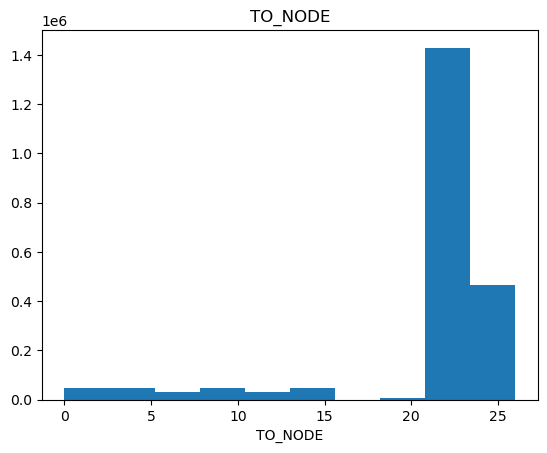

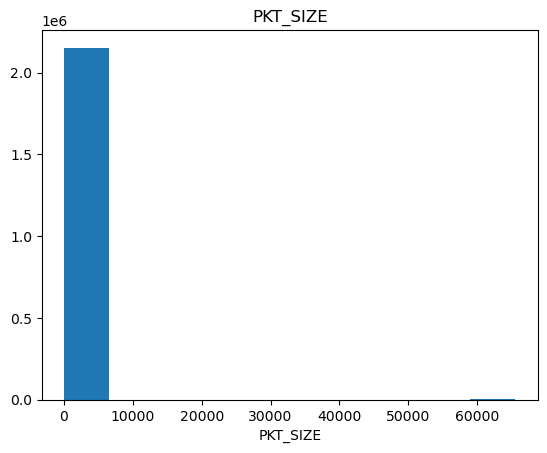

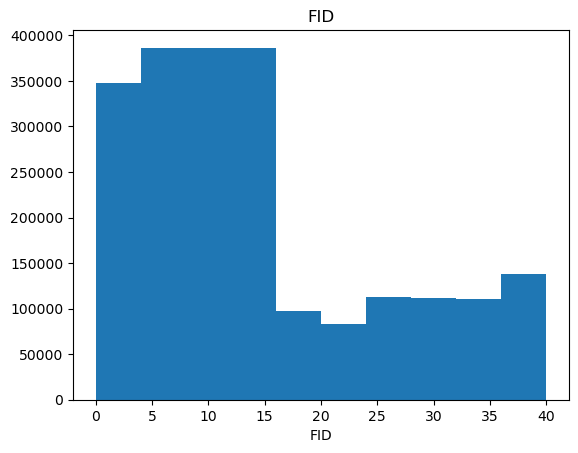

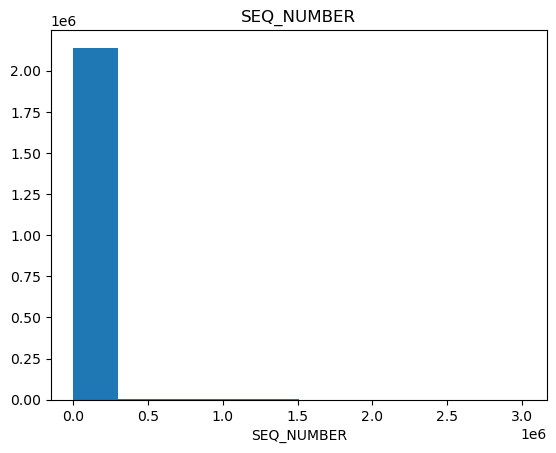

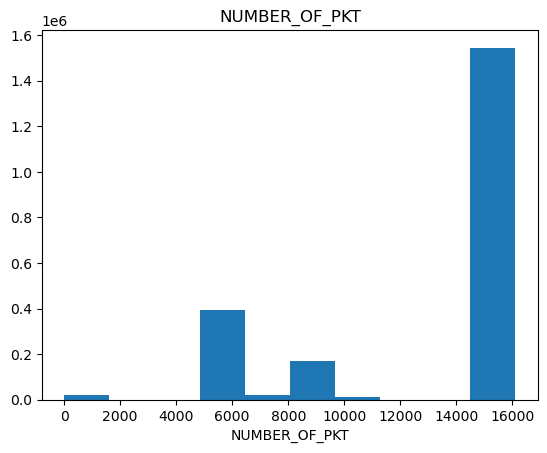

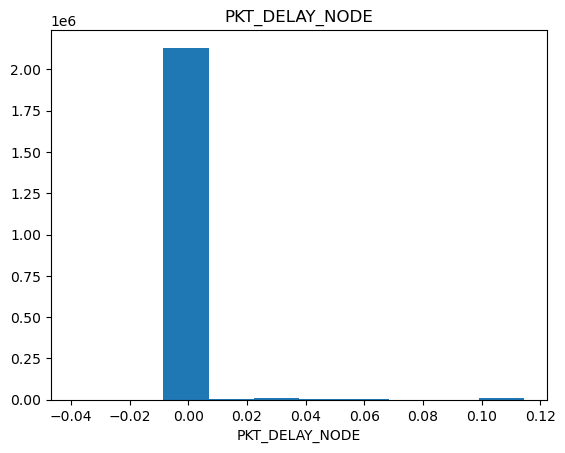

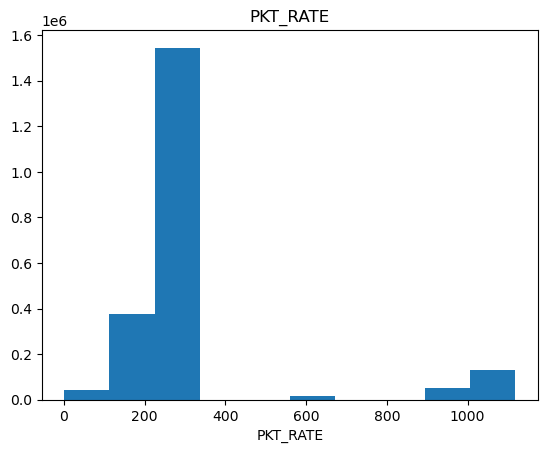

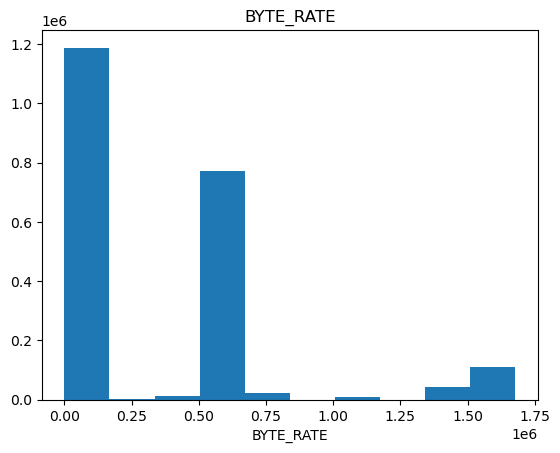

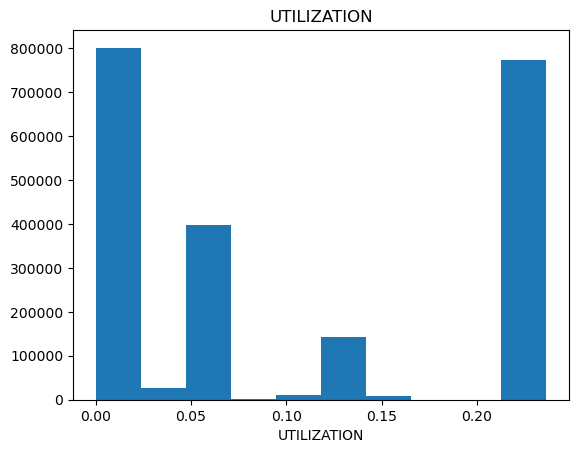

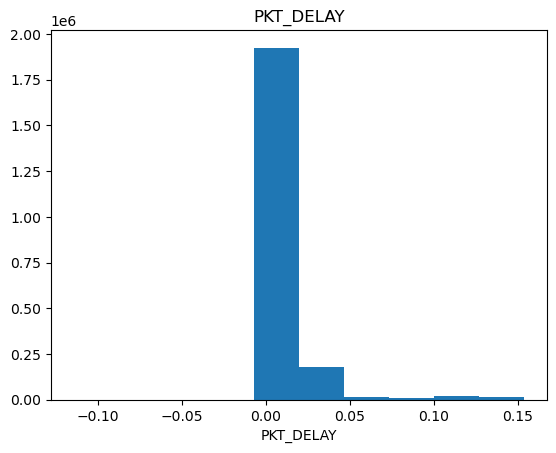

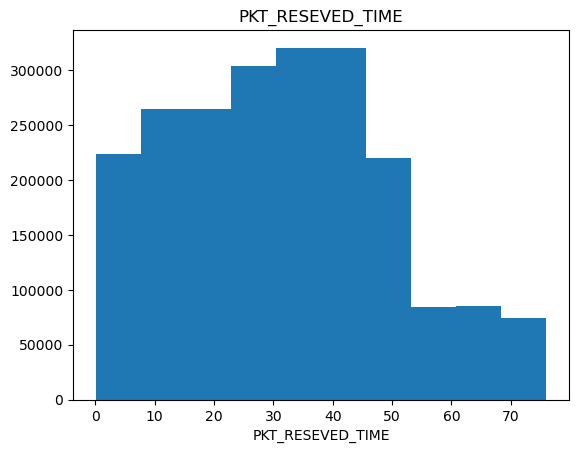

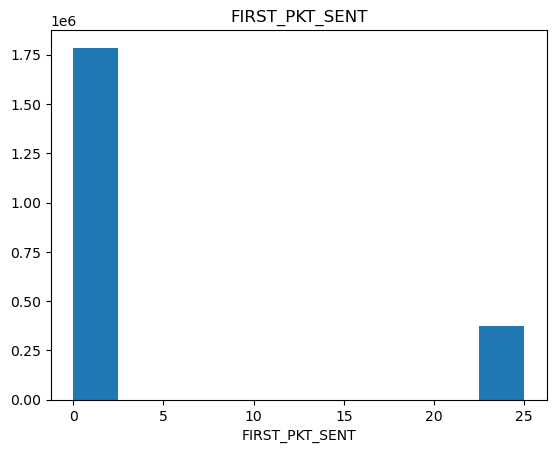

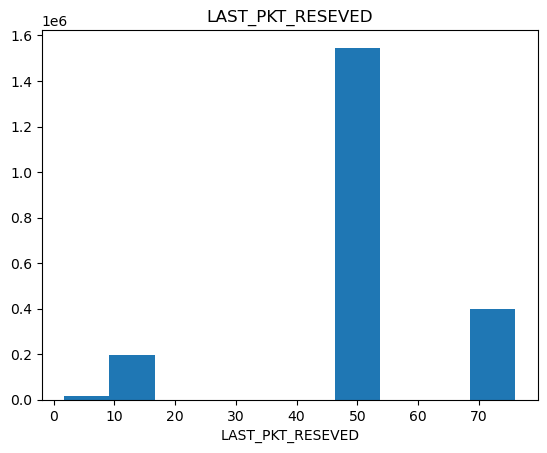

In [52]:
for column in numeric_df:
    plt.figure()
    plt.hist(numeric_df[column], bins=10)
    plt.title(column)
    plt.xlabel(column)
    plt.show()

<font color='red'> We can see that: </font>
* There are some big oultiers in `packet size` and `packet_delay_node`, need to have a closer look further down
* No normal distribution across numeric variables
* Travel time to and from node have similar distribution
* There are no much difference in delay time across packets

#### 3.3.3 Bivariate - with categorical variable.

In [16]:
categorical_df.columns

Index(['PKT_TYPE', 'FLAGS', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_CLASS'], dtype='object')

In [44]:
categorical_df.iloc[:, :-1]

,PKT_TYPE,FLAGS,NODE_NAME_FROM,NODE_NAME_TO
0,tcp,-------,switch1,router
1,tcp,-------,router,server1
2,ack,-------,router,switch2
3,ack,-------,router,switch1
4,ack,-------,router,switch1
...,...,...,...,...
2160663,ack,-------,switch2,client-10
2160664,ack,-------,router,switch2
2160665,tcp,-------,switch1,router
2160666,tcp,-------,client-5,switch1


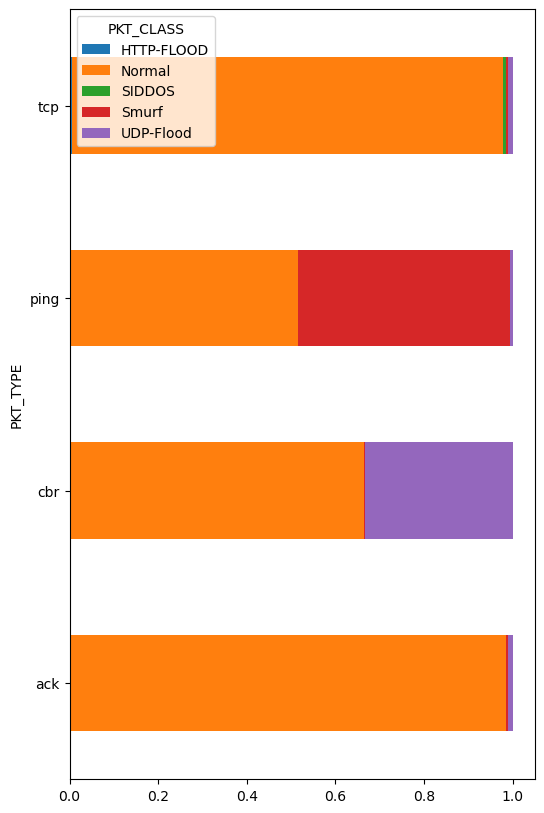

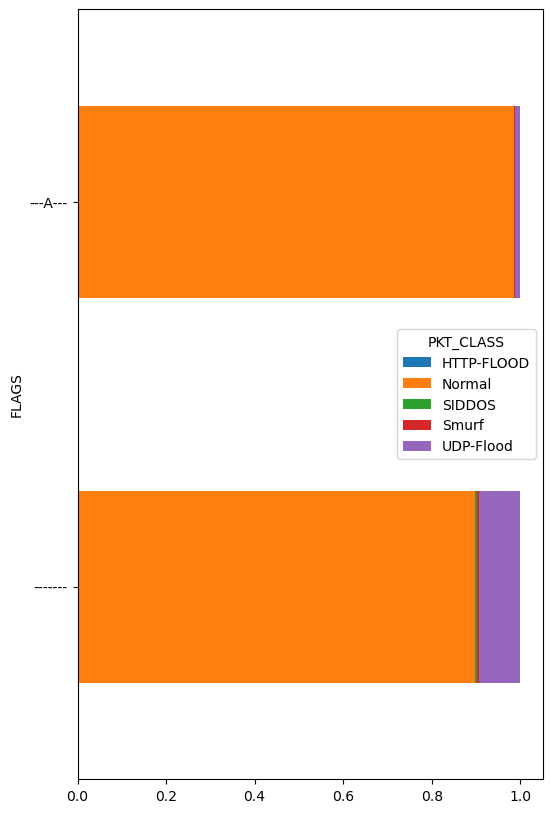

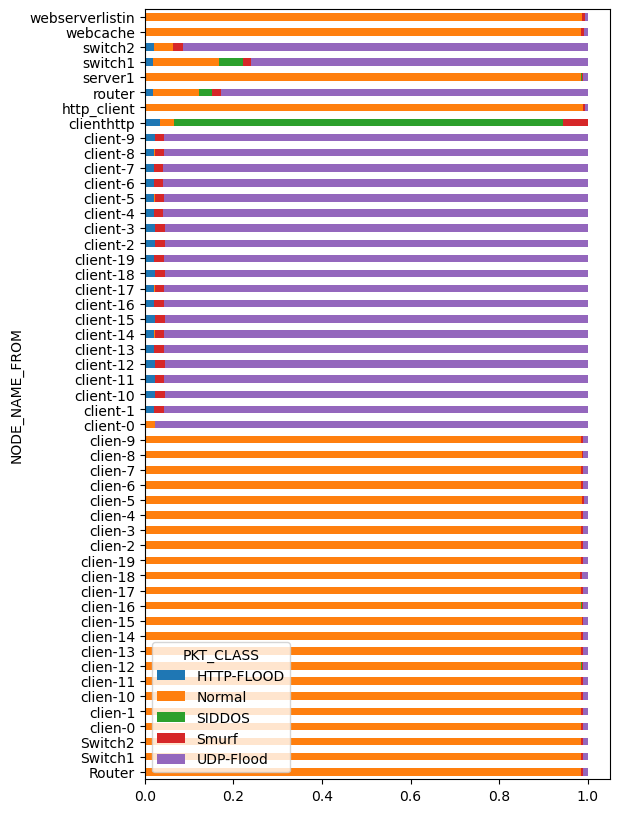

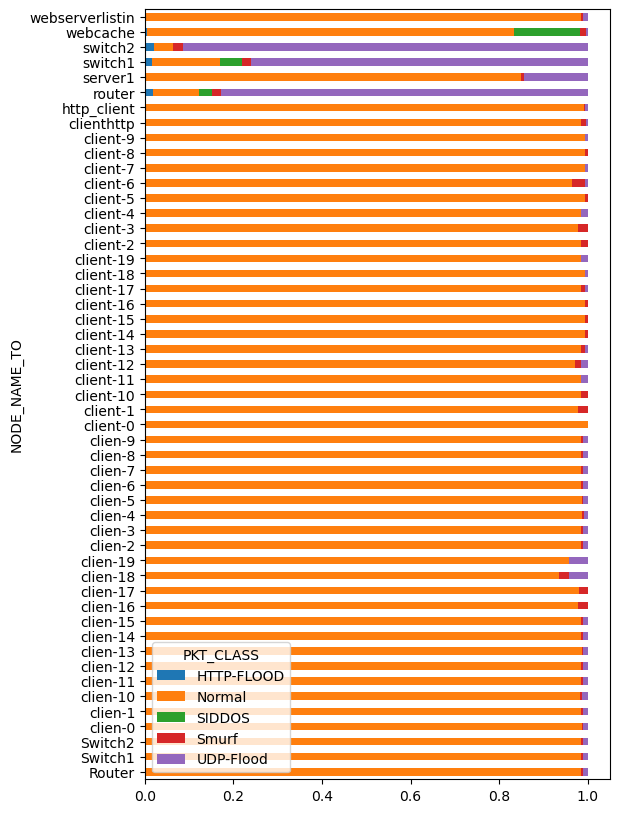

In [22]:
# Iterate over each categorical column except the last (PCT_CLASS)
for column in categorical_df.iloc[:, :-1]:

    pct_network_df = categorical_df.groupby([column, 'PKT_CLASS'])[column].count()/network_df.groupby(column)[column].count()

    pct_network_df.unstack().plot(kind='barh', stacked=True, figsize=(6,10))
    plt.show()

<font color='red'>What we see from it: </font>

* Client-0 to Client-19 generated most of the malicious traffic
* Switch-1, Switch-2 and router generated and received most of the malicious traffic
* Sizeble portion of `Ping` and `cbr` packet types were used for malicous attacks
* Most of the packets originated from HTTP_client node were used for `SIDDOS` attack

#### 3.3.4 Bivariate Analysis - Numeric Features

Now we will repeat the process for numeric variables.

In [16]:
# Groupby
network_df1.groupby('PKT_CLASS').mean(numeric_only=True)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
PKT_CLASS,,,,,,,,,,,,,,,,,
HTTP-FLOOD,10.530900,24.320903,37674.932603,18.365937,22.847202,31412.905596,0.000000,1.408759,578.004866,0.014987,26.928764,7.256823e+05,0.063104,0.091904,36.222507,0.064301,12.674448
Normal,14.907160,17.616238,315193.871288,19.738564,20.627485,827.769129,12.525547,20293.422934,13953.603895,0.000806,288.520687,2.324569e+05,0.108115,0.002201,30.630324,5.594551,54.521992
SIDDOS,19.695052,24.652915,81005.515829,21.241260,22.913578,100.236459,0.674119,835.695124,7449.205551,0.000297,104.976245,1.859594e+04,0.009896,0.068330,63.170135,1.436532,74.877048
Smurf,13.654500,19.891608,215931.061795,19.327403,21.372121,21420.942097,8.013582,21169.259651,9231.683638,0.005981,197.478455,6.307281e+05,0.110399,0.034445,33.093795,3.653447,40.378111
UDP-Flood,10.159883,23.837055,67396.131223,18.145820,22.609291,1318.643193,28.693748,2684.934306,9569.803883,0.002646,940.048809,1.271845e+06,0.117692,0.035229,37.266134,1.469260,14.423046


<font color='red'>The initial thoughts about numeric features: </font>

As 99% of the data is `normal` and `UDP-Flood` classes, let's draw our thoughts based on them.

- HTTP-FLOOD and Smurf attacks had way bigger `PKT_SIZE`. That's a sign of the malicious traiffc.
- Normal traffic has higher `number of packet`.
- Number of bytes are similar.
- `PKT_DELAY_NODE`. Normal traffic has lower delay, i.e. raches the destination node faster than malisious traffic.
- Malicous traffic had higher `packet rate`, meaning more packets are sent per unit of time. </br>
<font color='red'>This might be a very good predictor, as DDOS attacks are conducted through sending enormous amount of traffic to take down the server </font>
- `Byte_rate`. Byte rate, is also higher at malicious traffic. </br>
<font color='red'>Also a good predictor since during the DDOS attak, higher number of packets involves higher number of Byte_rate (bytes sent per the unit of time) </font>
- `Average size of the packet` is lower at normal traffic.
- Not much difference in network utilization. </br>
<font color='red'> This is quite surprising since network utilisation has to be higher for the malicious traffic</font>
- `PKT_DELAY`. Total travel time from source to desitination of normal network is considerably lower than malicious traffic. </br>
<font color='red'>Due to high amount of packets, malicious traffic also got higher delay </font>

In [25]:
numeric_df['PKT_CLASS'] = network_df1['PKT_CLASS']

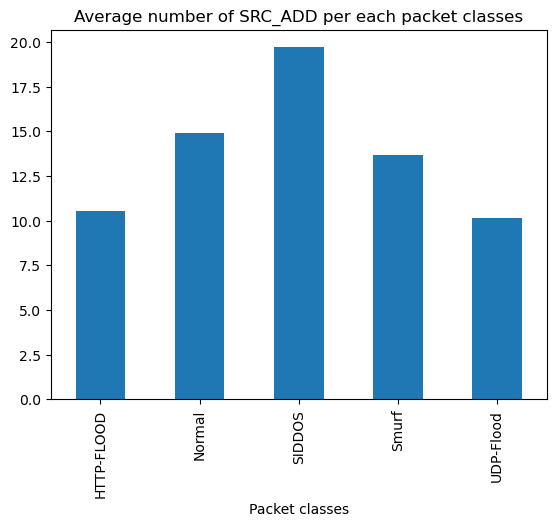

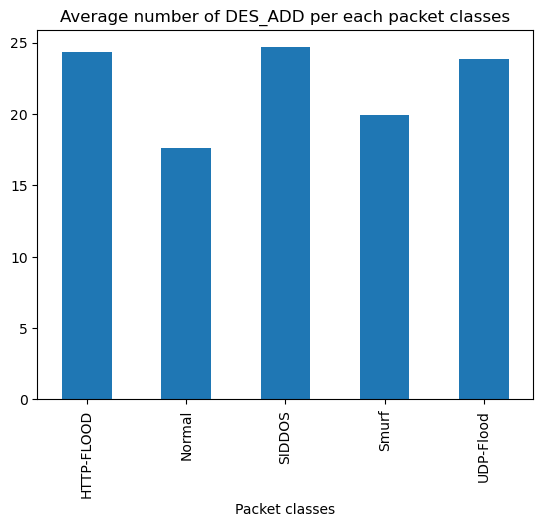

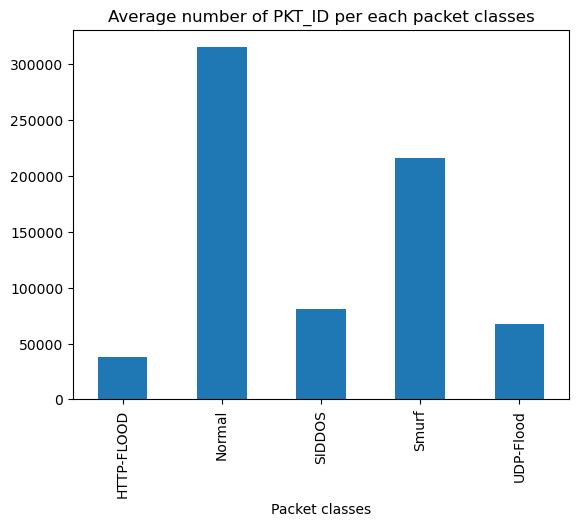

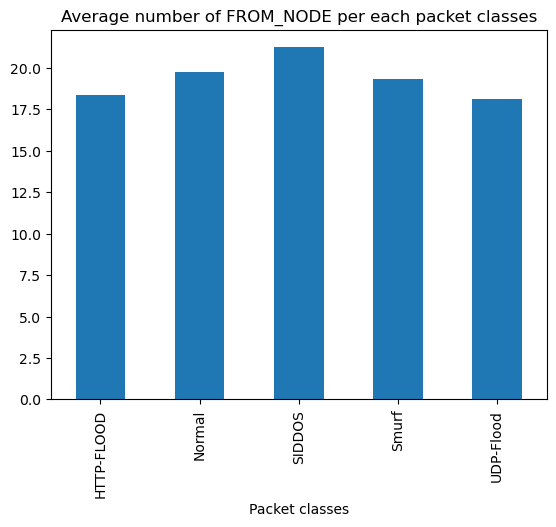

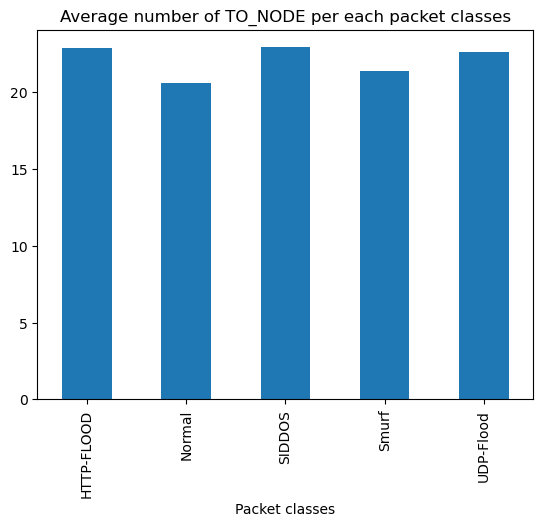

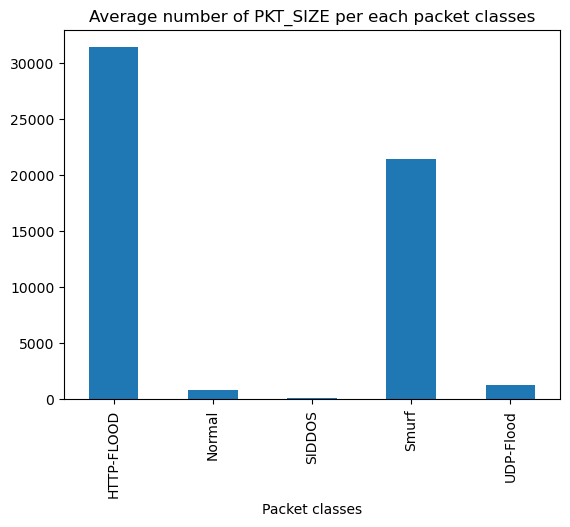

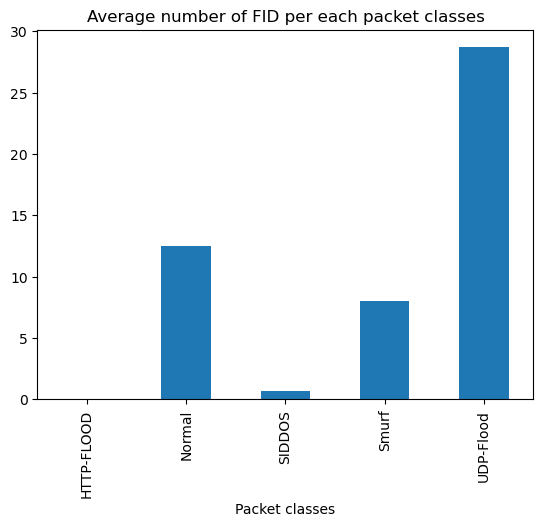

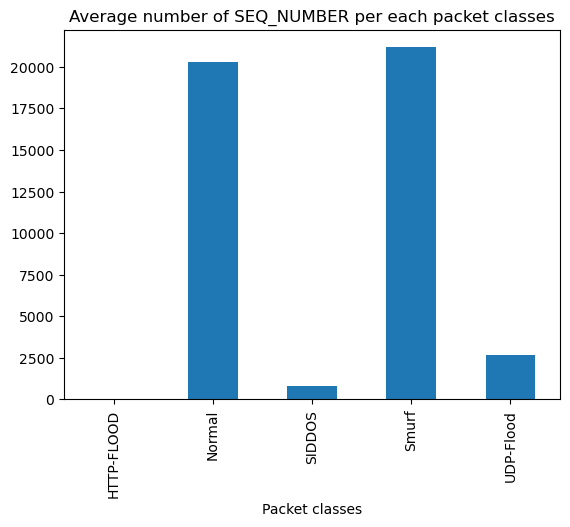

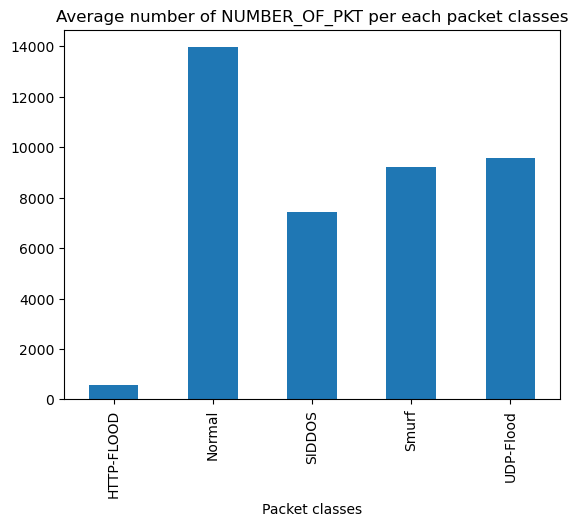

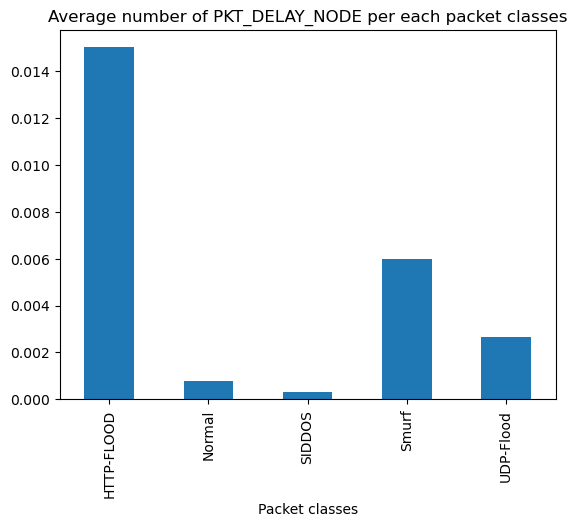

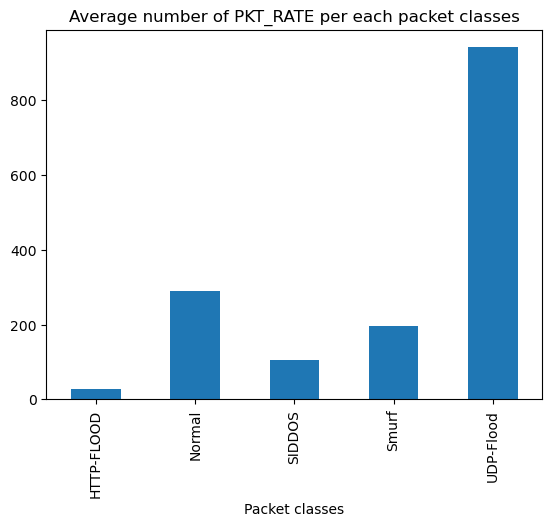

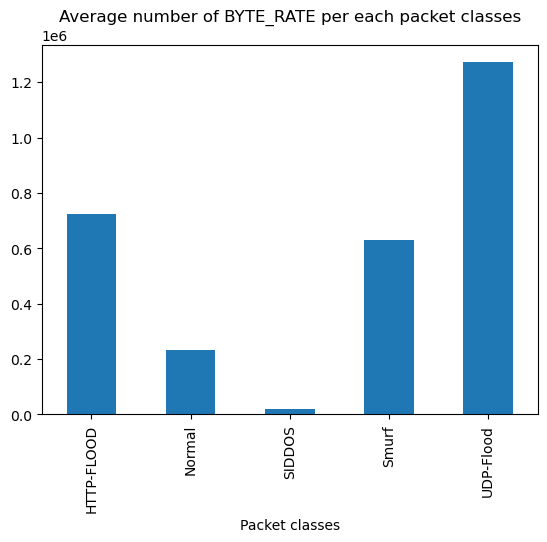

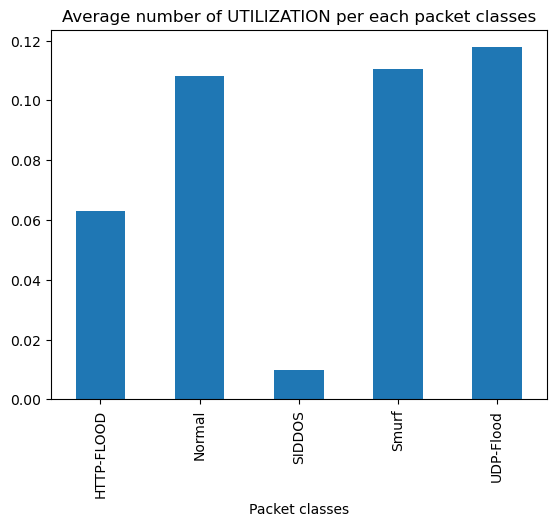

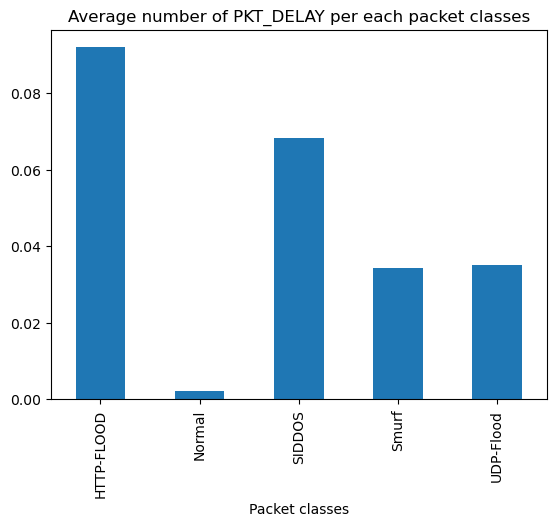

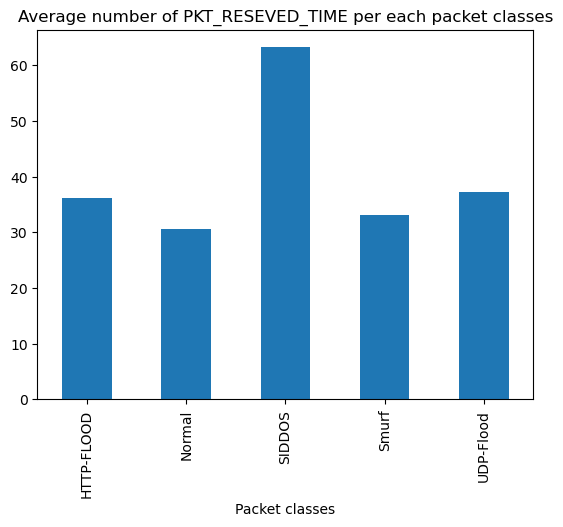

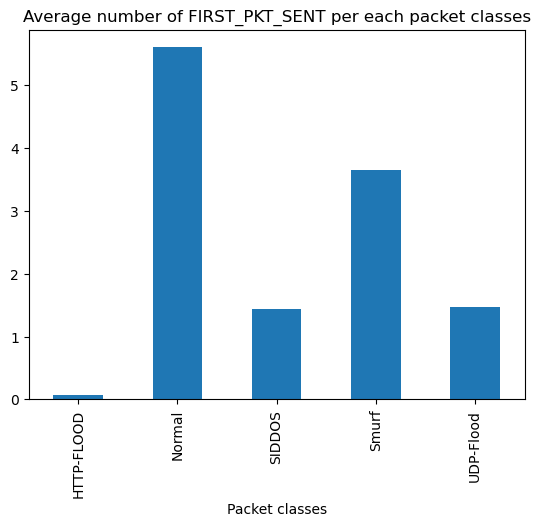

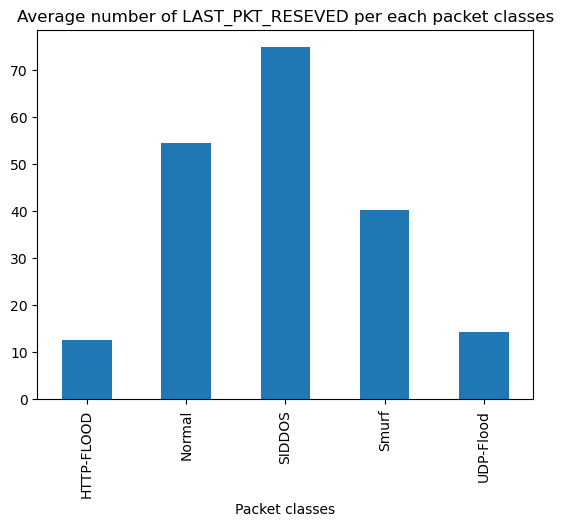

In [26]:
for col in numeric_df.iloc[:, :-1]:

    numeric_df.groupby('PKT_CLASS')[col].mean().plot(kind='bar')
    plt.xlabel('Packet classes')
    plt.title(f'Average number of {col} per each packet classes')
    plt.show()

The insights drawn:
* `SRC_ADD` and `DEST_ADD` - features seeem not to be significant as predictor
* `PKT_ID`- is the ID and don't seem to be significant as predictor
* `FROM_NODE` and `TO_NODE` - look very similar across all packet classes and also not seem to be significant predictors
* `FIRST_PKT_SENT` and `LAST_PKT_RESEVED` - UDP-Flood packets were <font color='red'>sent and recevied earlier </font> than Normal traffic.
* `PKT_RESEVED_TIME` - relatively similar avg value across all classes, with spike at SIDDOS.
* `UTILIZATION` - Normal and UDP-Flood had comparable network utilisation rate
* `BYTE_RATE` and `PKT_RATE` - As expected, <font color='red'>UDP-FLOOD packets had higher packet and byte rates </font> indicating one of the main features of the DDOS attack, which is flooding the network through sending a big amount of packets to flood the server.
* `PKT_DELAY_NODE` - <font color='red'>Malicious traffic had higher delays </font>
* `SEQ_NUMBER`  - <font color='red'>Normal traffic had longer sequence of packets </font>
* `PKT_SIZE` - Normal and UDF-Flood packet classes had comparable avg pkt size.


Let's look at the distribution of independent variables for each target class using boxplot and see if there are some outliers.

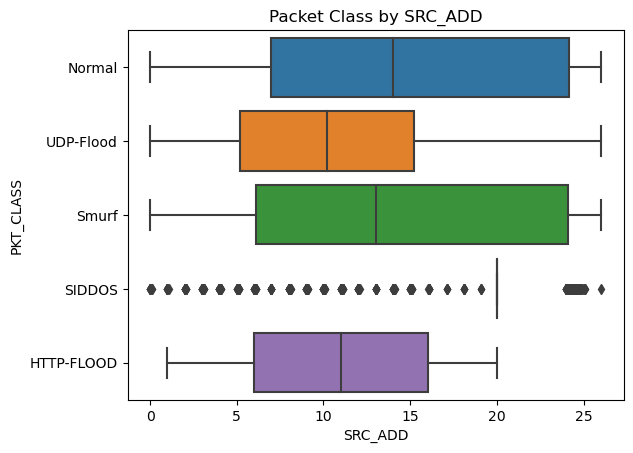

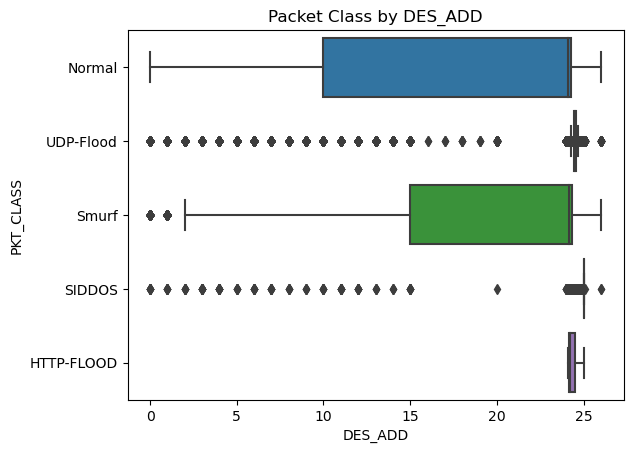

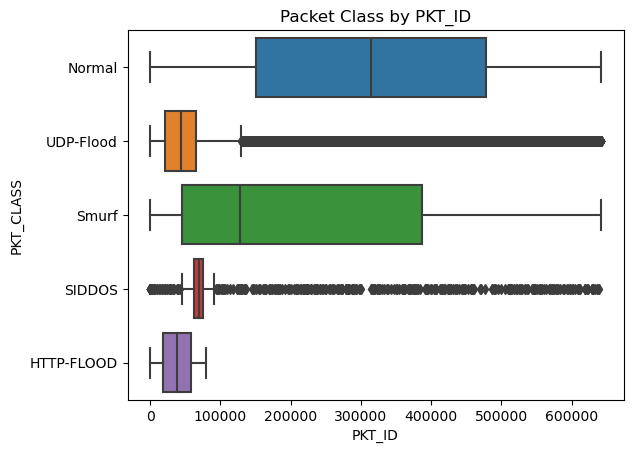

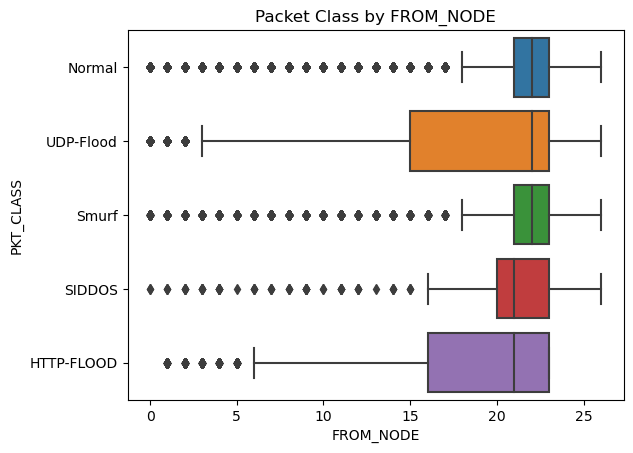

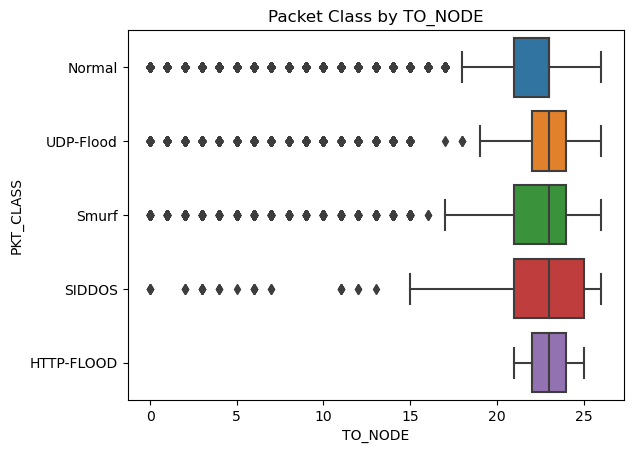

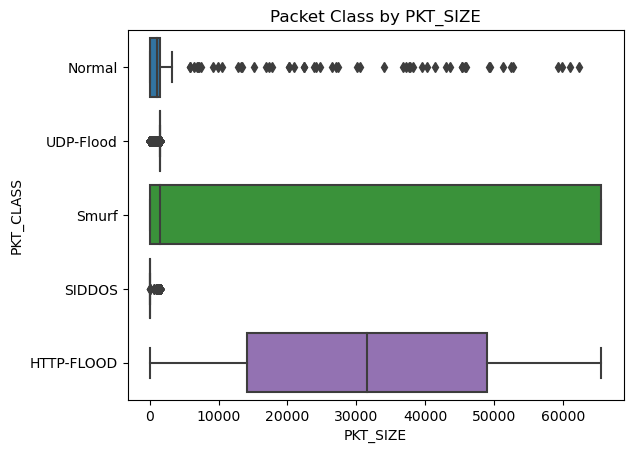

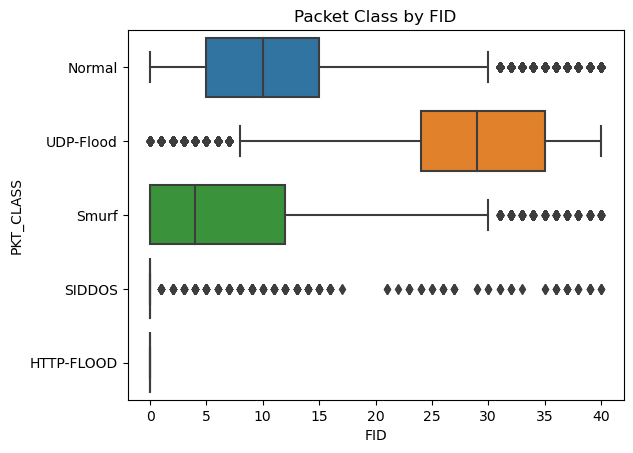

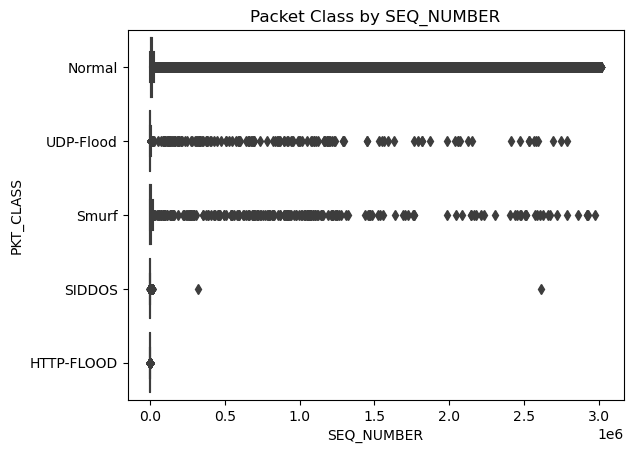

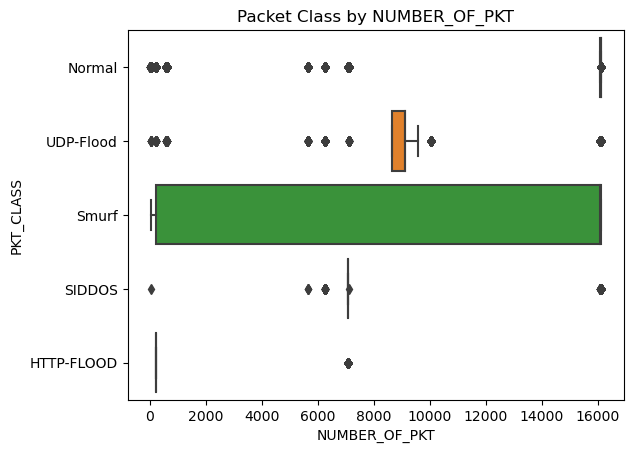

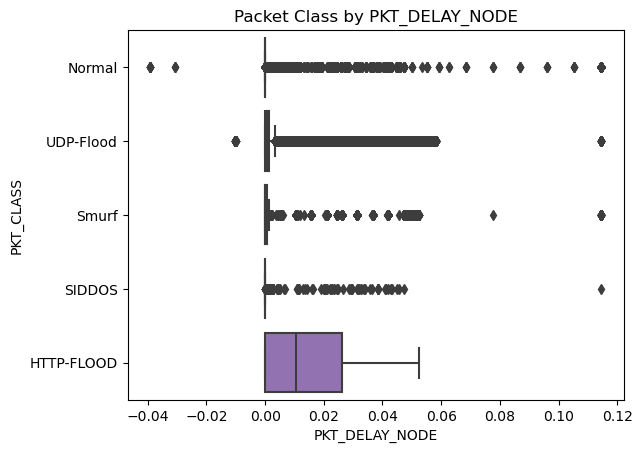

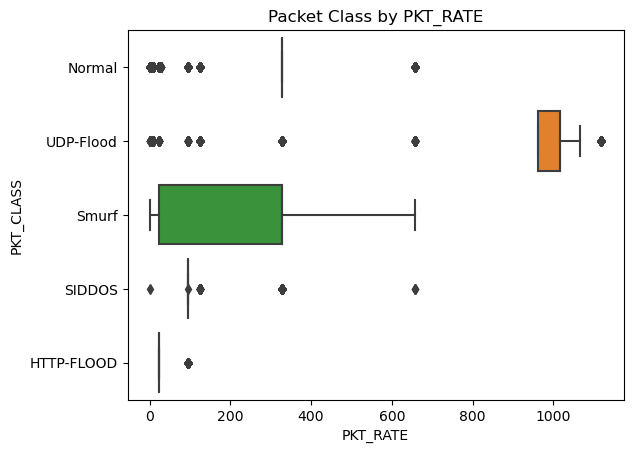

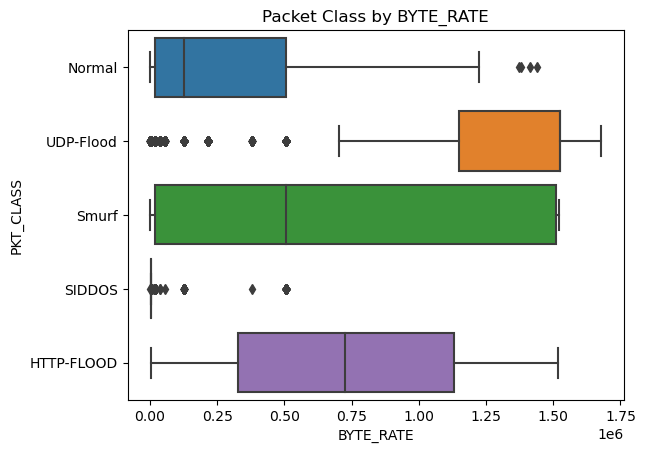

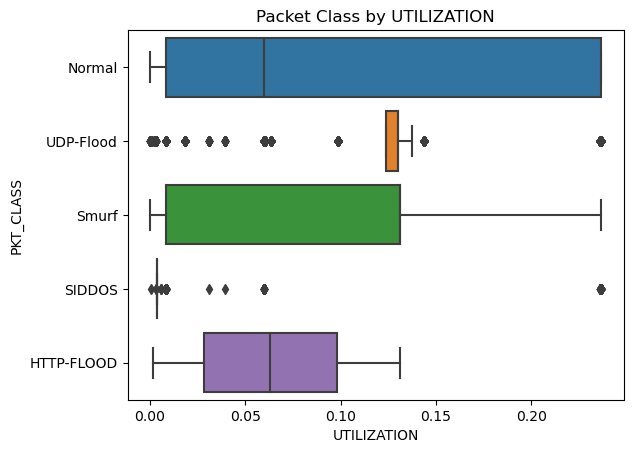

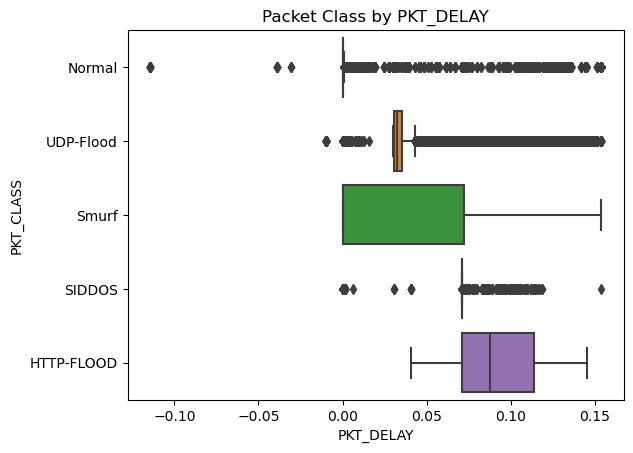

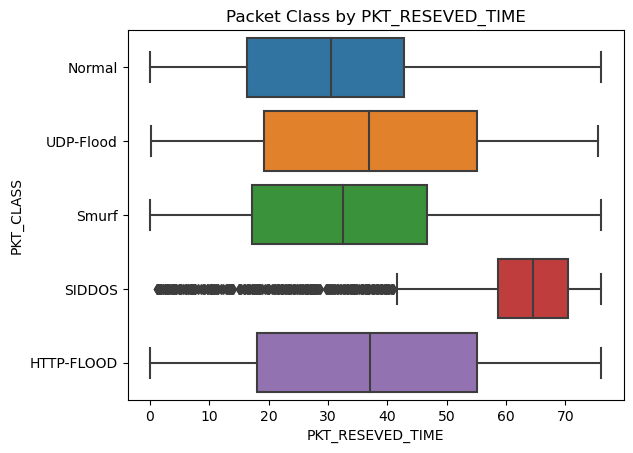

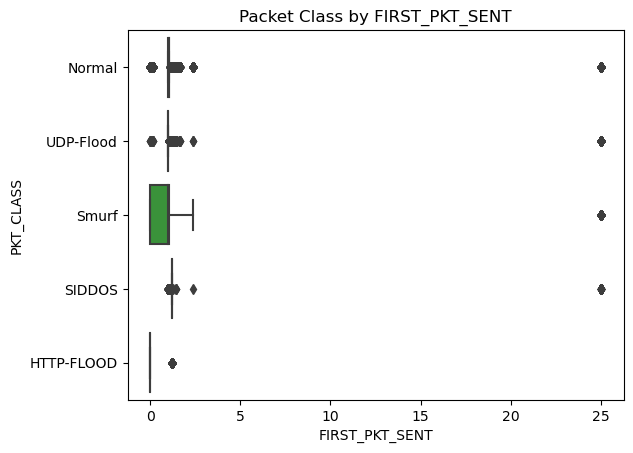

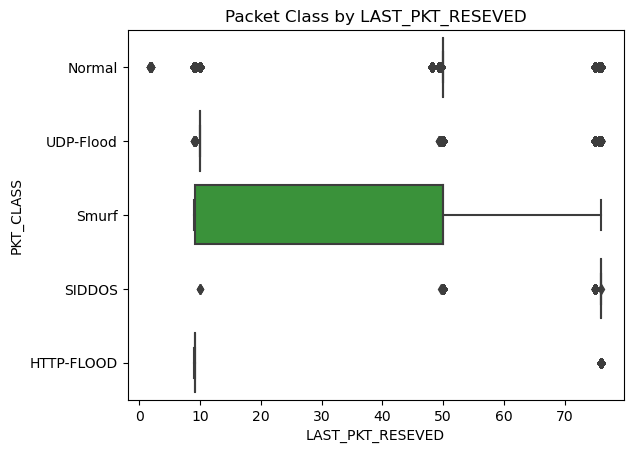

In [27]:
for col in numeric_df.iloc[:, :-1]:

    # Normalize the histogram by passing in 'stat=density' to account for differences in
    # counts by class.
    sns.boxplot(x=col, y='PKT_CLASS', data=network_df1)
    plt.title(f'Packet Class by {col}')
    plt.show()

* UDP-Flood and HTTP-FLOOD packet came from wider range of nodes rather than other packet classes
* SMURF and HTTP-FLOOD packets have greater size than other pakcket classes
* SMURF class had greater variaty of pack average size, number of packets and byte rate
* Normal traffic had utlizized network more than other traffics.


## Summary 

From our initial analysis let's summarize what we have found out:

* Only 10% of data is of target value. We might need to merge all attack classes into one to get more balanced dataset.
* Data is relatively clean.
* Some key fields like IP, timestamps have been anonymized due to sensitivity.
* Ping and cbr packets were used more than other types of packets for network attack purposes. Adversaries had used ligt or empty packets to conduct attacks. So, that might have been done to evade security solutions like Anti-Virus and Firewall which thoroughly examine payload.
* There is no any particular node that had initiated network attacks more than others, so all clients relativelly equally generated malicious traffic.

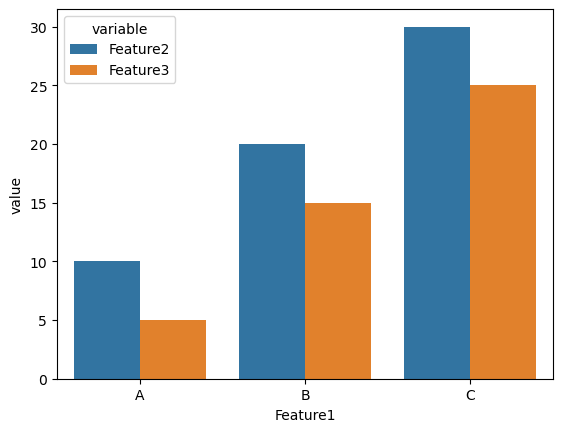

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example DataFrame
data = {
    'Feature1': ['A', 'B', 'C'],
    'Feature2': [10, 20, 30],
    'Feature3': [5, 15, 25]
}
df = pd.DataFrame(data)

# Create grouped bar plot
sns.barplot(x='Feature1', y='value', hue='variable', data=pd.melt(df, id_vars='Feature1'))

# Show plot
plt.show()